In [2]:
# opens SQL query directly in Python, rather than open from CSV
# pyodbc for ODBC connection
import pyodbc
# pandas for 'excel' like sheets
import pandas as pd
# datetime for date computer date

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=ASU_Professor_Salary;Trusted_Connection=yes;')
cursor = connection.cursor()

ASU_Dept_Add_Remove = '''
  select 
	[Calendar_Year]
	,[ADD_or_REM]
	,sum([Total_Salary]) as _SUM
  from [dbo].[ASU_Dept_Changes]
  group by [Calendar_Year], [ADD_or_REM]
  order by [Calendar_Year]

  '''
# save the sql query to a pandas dataframe
Dep_Add_Remove = pd.read_sql(ASU_Dept_Add_Remove, connection)
connection.close()
Dep_Add_Remove

Calendar_Year ADD_or_REM       _SUM
0            2013        ADD   73036851
1            2013        REM   51567355
2            2014        ADD   62155622
3            2014        REM   53909745
4            2015        ADD   93865433
5            2015        REM   60314851
6            2016        ADD   57095158
7            2016        REM   41136049
8            2017        ADD  106115810
9            2017        REM   72145638
10           2018        ADD  111814548
11           2018        REM   91200913

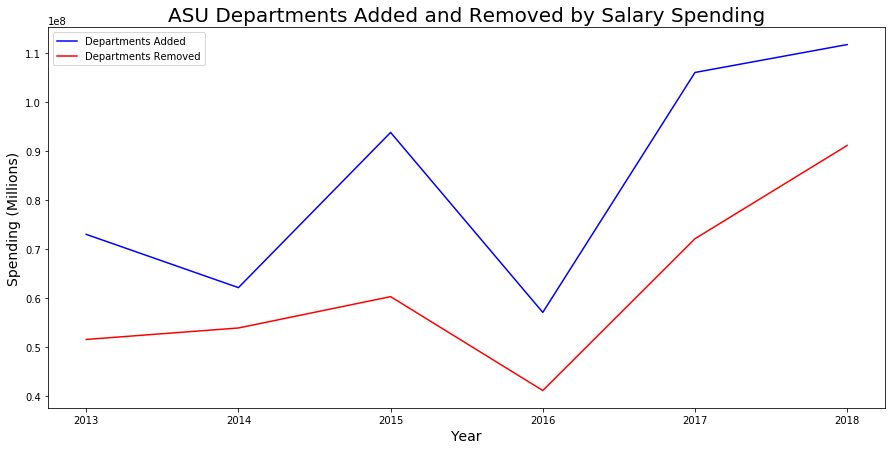

In [52]:
Dep_Added = Dep_Add_Remove.loc[Dep_Add_Remove['ADD_or_REM'] == 'ADD'] #filter for departments added
Dep_Removed = Dep_Add_Remove.loc[Dep_Add_Remove['ADD_or_REM'] == 'REM'] #filter for departments removed

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size
plt.title("ASU Departments Added and Removed by Salary Spending",fontsize=20)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Spending (Millions)",fontsize=14)

y1 = Dep_Added['_SUM']
y2 = Dep_Removed['_SUM']
x = Dep_Added['Calendar_Year'] 

plt.plot(x, y1, label= 'Departments Added', color='blue')
plt.plot(x, y2, label= 'Departments Removed',color='red')

plt.legend()

In [53]:
# opens SQL query directly in Python, rather than open from CSV
# pyodbc for ODBC connection
import pyodbc
# pandas for 'excel' like sheets
import pandas as pd
# datetime for date computer date

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=ASU_Professor_Salary;Trusted_Connection=yes;')
cursor = connection.cursor()

ASU_Dept_Add_Remove_Count = '''
  select 
	[Calendar_Year]
	,[ADD_or_REM]
	,count([ADD_or_REM]) as _Count
  from [dbo].[ASU_Dept_Changes]
  group by [Calendar_Year], [ADD_or_REM]
  order by [Calendar_Year]

  '''
# save the sql query to a pandas dataframe
Dept_Add_Remove_Count = pd.read_sql(ASU_Dept_Add_Remove_Count, connection)
connection.close()
Dept_Add_Remove_Count


Calendar_Year ADD_or_REM  _Count
0            2013        ADD      93
1            2013        REM      65
2            2014        ADD      85
3            2014        REM      68
4            2015        ADD     122
5            2015        REM      72
6            2016        ADD     122
7            2016        REM      83
8            2017        ADD     184
9            2017        REM     118
10           2018        ADD     175
11           2018        REM     160

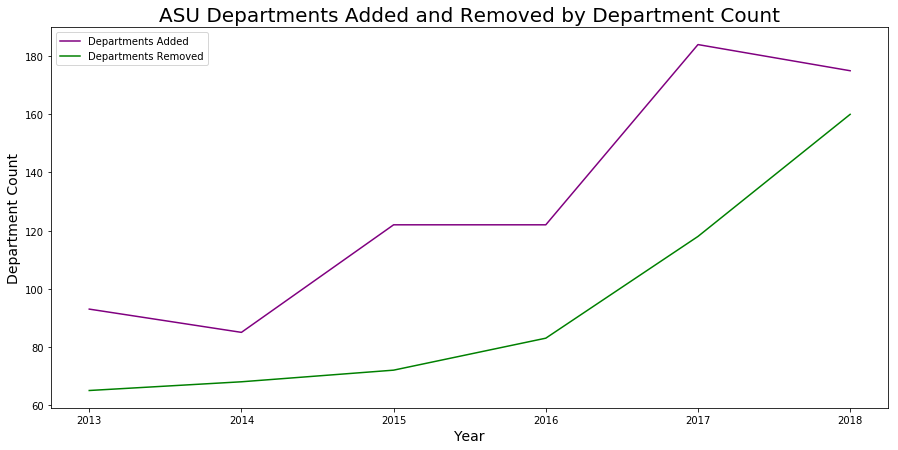

In [50]:
Dep_Added = Dept_Add_Remove_Count.loc[Dep_Add_Remove['ADD_or_REM'] == 'ADD'] #filter for departments added
Dep_Removed = Dept_Add_Remove_Count.loc[Dep_Add_Remove['ADD_or_REM'] == 'REM'] #filter for departments removed

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size
plt.title("ASU Departments Added and Removed by Department Count",fontsize=20)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Department Count",fontsize=14)

y1 = Dep_Added['_Count']
y2 = Dep_Removed['_Count']
x = Dep_Added['Calendar_Year'] 

plt.plot(x, y1, label= 'Departments Added',color='purple')
plt.plot(x, y2, label= 'Departments Removed', color='green')

plt.legend()